In [ ]:
# 박지현 선생님 깃허브 
# https://github.com/pjinpil/cn-edu-modernization

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np

In [ ]:
# 한글 폰트 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 워드 클라우드 사용 준비 및 폰트 확인
import wordcloud as wc
import matplotlib.pyplot as plt
import matplotlib.font_manager as font
sys_f = font.findSystemFonts()

[f for f in sys_f if "Nanum" in f]

['/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',

In [ ]:
#폰트 선택 _ 위의 결과에서 사용할 폰트의 주소 넣기 (현재, 나눔스퀘어)
path = "/usr/share/fonts/truetype/nanum/NanumSquareL.ttf"
font_name = font.FontProperties(fname=path, size=11).get_name()
plt.rc('font', family=font_name)

In [ ]:
def color_func(dictionary, color):
    value_max = max(dictionary.values())
    value_min = min(dictionary.values())
    RGB_rate = 255 / (value_max - value_min)
    
    def inner(word, font_size, position, orientation, random_state=None, **kwargs):
        RGB_score = (dictionary[word] - value_min) * RGB_rate
        
        if(color == "green"):
            return "RGB(%d,%d,%d)" % ( 0   ,  224-  RGB_score/2  , 0 )

        if(color == "blue"):
            return "RGB(%d,%d,%d)" % ( 0,    192 - RGB_score/4*3    ,   255 - RGB_score/4    )
    
        if(color == "red"):
            return "RGB(%d,%d,%d)" % ( 255 ,    192 - RGB_score/4*3    ,   0    )

        if(color == "gray"):
            return "RGB(%d,%d,%d)" % ( 96 - RGB_score/8*3   ,  96 - RGB_score/8*3   ,  96 - RGB_score/8*3   )

    return inner

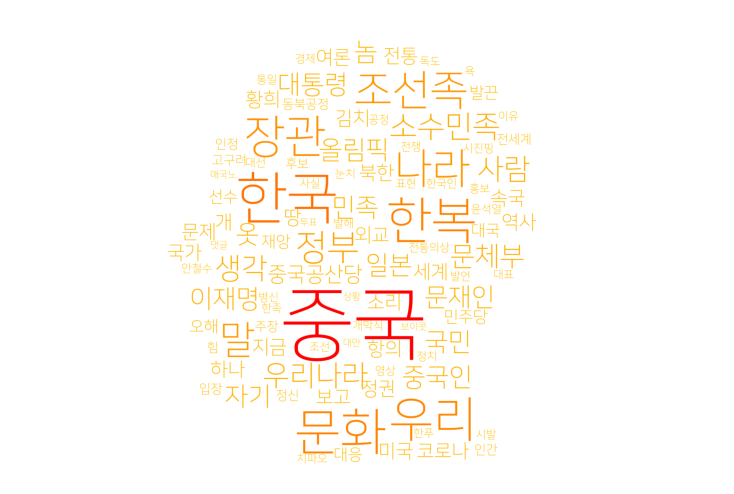

In [ ]:
name = "wc7-3"

# color = "green"
color = "red"
# color = "blue"
# color = "gray"

mask = Image.open('/content/머리.png')
# mask = Image.open('/content/brain.png')
# mask = Image.open('/content/brain.png')


df_group=pd.read_csv('/content/개막식(최종).csv', index_col=0)
dic = df_group['score'].to_dict()
mask = np.array(mask)

ransta = 0

wordcloud = WordCloud(background_color = "white",
                  min_font_size = 1,
                  font_path= path,
                  scale = 10,
                  # colormap='autumn',
                  prefer_horizontal = 1,
                  mask=mask,
                  max_font_size = 50,
                  random_state = ransta,
                  color_func=color_func(dic, color)
                  ).generate_from_frequencies(dic)

plt.figure(figsize = (10, 10), facecolor = None)  
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

wordcloud.to_file(name + '.png')